# Library Imports


In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder

# Loading Dataset:

In [7]:
def merge_relevant_weather_data(data_directory):
    weather_files = [file for file in os.listdir(data_directory) if file.endswith(".csv")]
    weather_data = []

    for filename in weather_files:
        filepath = os.path.join(data_directory, filename)
        index_as_header = pd.read_csv(filepath, nrows=1).columns[0] == "0"
        header = "infer" if not index_as_header else 1

        dataframe = pd.read_csv(filepath, header=header)

        if "colchester" in filename.lower():
            weather_data.append(dataframe)

    combined_df = pd.concat(weather_data, ignore_index=True)
    return combined_df

#Kindly give directory path of dataset
data_path = "../../Ali Hassan_2311555/Colchester"
combined_weather_df = merge_relevant_weather_data(data_path)
df = combined_weather_df

In [8]:
df.head()

,datetime,temp,dew,humidity,precip,precipprob,preciptype,snow,snowdepth,windspeed,winddir,sealevelpressure,cloudcover,solarradiation,uvindex,solarenergy
0,2000-01-01T00:00:00,5.9,5.7,98.63,0.0,0.0,NaN,NaN,NaN,9.4,210.0,1020.6,NaN,NaN,NaN,NaN
1,2000-01-01T01:00:00,6.4,5.8,96.12,0.0,0.0,NaN,NaN,NaN,15.1,233.0,1020.4,100.0,NaN,NaN,NaN
2,2000-01-01T02:00:00,6.6,6.4,98.31,0.0,0.0,NaN,NaN,NaN,13.9,238.0,1020.5,100.0,NaN,NaN,NaN
3,2000-01-01T03:00:00,7.2,6.5,95.92,0.0,0.0,NaN,NaN,NaN,14.1,232.0,1020.5,100.0,NaN,NaN,NaN
4,2000-01-01T04:00:00,7.2,6.6,96.38,0.0,0.0,NaN,NaN,NaN,14.3,242.0,1020.4,100.0,NaN,NaN,NaN


# Data Details:

In [9]:
df.describe()

,temp,dew,humidity,precip,precipprob,snow,snowdepth,windspeed,winddir,sealevelpressure,cloudcover,solarradiation,uvindex,solarenergy
count,187606.000000,187600.000000,187602.000000,187437.000000,187590.000000,186478.000000,186429.000000,187627.000000,187595.000000,180462.000000,184405.000000,94894.000000,94897.000000,94908.000000
mean,10.503048,7.190720,81.596979,0.067773,10.276578,0.001008,0.062193,15.998126,198.262143,1013.922618,59.510905,122.256657,1.203104,0.439357
std,6.004301,4.956358,14.085087,0.623144,30.357300,0.043173,0.602604,7.916611,95.653613,29.713385,31.985577,198.631750,2.006343,0.715817
min,-9.600000,-10.800000,22.430000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.100000,3.600000,73.490000,0.000000,0.000000,0.000000,0.000000,10.100000,126.000000,1008.300000,34.000000,0.000000,0.000000,0.000000
50%,10.300000,7.400000,85.480000,0.000000,0.000000,0.000000,0.000000,14.600000,218.000000,1015.500000,66.600000,9.000000,0.000000,0.000000
75%,14.700000,10.900000,92.680000,0.000000,0.000000,0.000000,0.000000,20.700000,267.000000,1022.000000,88.900000,169.500000,2.000000,0.600000
max,35.000000,21.500000,100.000000,84.324000,100.000000,9.100000,15.230000,74.700000,360.000000,1048.900000,100.000000,1054.000000,10.000000,3.800000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188024 entries, 0 to 188023
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   datetime          188024 non-null  object 
 1   temp              187606 non-null  float64
 2   dew               187600 non-null  float64
 3   humidity          187602 non-null  float64
 4   precip            187437 non-null  float64
 5   precipprob        187590 non-null  float64
 6   preciptype        19448 non-null   object 
 7   snow              186478 non-null  float64
 8   snowdepth         186429 non-null  float64
 9   windspeed         187627 non-null  float64
 10  winddir           187595 non-null  float64
 11  sealevelpressure  180462 non-null  float64
 12  cloudcover        184405 non-null  float64
 13  solarradiation    94894 non-null   float64
 14  uvindex           94897 non-null   float64
 15  solarenergy       94908 non-null   float64
dtypes: float64(14), obje

# Column Types Modification:
~Changing Data column type from object to Date & Time.
~For preciptype object below 3 steps are followed
Splitting Values
Encoding Categorical Data into 3 columns rain and rain and snow

In [11]:
df['datetime'] = pd.to_datetime(df['datetime'], dayfirst=False)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188024 entries, 0 to 188023
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   datetime          188024 non-null  datetime64[ns]
 1   temp              187606 non-null  float64       
 2   dew               187600 non-null  float64       
 3   humidity          187602 non-null  float64       
 4   precip            187437 non-null  float64       
 5   precipprob        187590 non-null  float64       
 6   preciptype        19448 non-null   object        
 7   snow              186478 non-null  float64       
 8   snowdepth         186429 non-null  float64       
 9   windspeed         187627 non-null  float64       
 10  winddir           187595 non-null  float64       
 11  sealevelpressure  180462 non-null  float64       
 12  cloudcover        184405 non-null  float64       
 13  solarradiation    94894 non-null   float64       
 14  uvin

We have preciptype column on which we have performed categorical data handling.

In [12]:
df['preciptype'] = df['preciptype'].str.strip()

# Handling missing values
df['preciptype'].fillna('None', inplace=True)

# Splitting values and creating dummy variables
precipitation_types = df['preciptype'].str.split(',', expand=True)

# Initialize columns for rain, snow, and rain and snow both
df['preciptype_rain'] = 0
df['preciptype_snow'] = 0
df['preciptype_rain_and_snow'] = 0

# Update values based on precipitation types
for index, row in precipitation_types.iterrows():
    if 'rain' in row.values and 'snow' in row.values:
        df.at[index, 'preciptype_rain_and_snow'] = 1
    elif 'rain' in row.values:
        df.at[index, 'preciptype_rain'] = 1
    elif 'snow' in row.values:
        df.at[index, 'preciptype_snow'] = 1

# Convert columns to boolean
df['preciptype_rain'] = df['preciptype_rain'].astype(bool)
df['preciptype_snow'] = df['preciptype_snow'].astype(bool)
df['preciptype_rain_and_snow'] = df['preciptype_rain_and_snow'].astype(bool)

# Drop the original 'Precipitation type' column
df.drop('preciptype', axis=1, inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188024 entries, 0 to 188023
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   datetime                  188024 non-null  datetime64[ns]
 1   temp                      187606 non-null  float64       
 2   dew                       187600 non-null  float64       
 3   humidity                  187602 non-null  float64       
 4   precip                    187437 non-null  float64       
 5   precipprob                187590 non-null  float64       
 6   snow                      186478 non-null  float64       
 7   snowdepth                 186429 non-null  float64       
 8   windspeed                 187627 non-null  float64       
 9   winddir                   187595 non-null  float64       
 10  sealevelpressure          180462 non-null  float64       
 11  cloudcover                184405 non-null  float64       
 12  so

In [14]:
df

,datetime,temp,dew,humidity,precip,precipprob,snow,snowdepth,windspeed,winddir,sealevelpressure,cloudcover,solarradiation,uvindex,solarenergy,preciptype_rain,preciptype_snow,preciptype_rain_and_snow
0,2000-01-01 00:00:00,5.9,5.7,98.63,0.0,0.0,NaN,NaN,9.4,210.0,1020.6,NaN,NaN,NaN,NaN,False,False,False
1,2000-01-01 01:00:00,6.4,5.8,96.12,0.0,0.0,NaN,NaN,15.1,233.0,1020.4,100.0,NaN,NaN,NaN,False,False,False
2,2000-01-01 02:00:00,6.6,6.4,98.31,0.0,0.0,NaN,NaN,13.9,238.0,1020.5,100.0,NaN,NaN,NaN,False,False,False
3,2000-01-01 03:00:00,7.2,6.5,95.92,0.0,0.0,NaN,NaN,14.1,232.0,1020.5,100.0,NaN,NaN,NaN,False,False,False
4,2000-01-01 04:00:00,7.2,6.6,96.38,0.0,0.0,NaN,NaN,14.3,242.0,1020.4,100.0,NaN,NaN,NaN,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188019,2024-01-05 05:00:00,5.2,4.1,92.17,NaN,0.0,NaN,NaN,27.6,325.0,993.2,100.0,0.0,0.0,0.0,False,False,False
188020,2024-01-05 06:00:00,5.2,4.0,92.40,NaN,0.0,NaN,NaN,29.6,317.0,993.5,96.6,0.0,0.0,0.0,False,False,False
188021,2024-01-05 07:00:00,5.5,4.0,89.64,NaN,0.0,NaN,NaN,28.1,308.0,994.5,95.8,0.0,0.0,0.0,False,False,False
188022,2024-01-05 08:00:00,5.8,4.1,88.93,NaN,0.0,NaN,NaN,27.9,313.0,996.1,91.8,0.0,0.0,0.0,False,False,False


# Analysis


In [15]:
print(df['datetime'].min(), df['datetime'].max())

2000-01-01 00:00:00 2024-01-05 09:00:00


In [16]:

df['datetime'] = pd.to_datetime(df['datetime'])
df['month'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year
df['week_of_year'] = df['datetime'].dt.isocalendar().week

df.set_index('datetime', inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 188024 entries, 2000-01-01 00:00:00 to 2024-01-05 09:00:00
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   temp                      187606 non-null  float64
 1   dew                       187600 non-null  float64
 2   humidity                  187602 non-null  float64
 3   precip                    187437 non-null  float64
 4   precipprob                187590 non-null  float64
 5   snow                      186478 non-null  float64
 6   snowdepth                 186429 non-null  float64
 7   windspeed                 187627 non-null  float64
 8   winddir                   187595 non-null  float64
 9   sealevelpressure          180462 non-null  float64
 10  cloudcover                184405 non-null  float64
 11  solarradiation            94894 non-null   float64
 12  uvindex                   94897 non-null   float64
 13  solarenerg

# Train / Test split

20 Years of data is selected(2004 - 2024) from the whole data set, And its is further splitted from 2004 till 2020 for training and 2020 onwards till 2024 to test data.


In [17]:
df = df.loc['2004-01':'2024-12'] 

train_Data = df.loc['2004-01':'2020-12']
test_Data = df.loc['2021-01':]

df = train_Data

# Handling Missing & Duplicate values for Training dataset

checking for missing values in dataframe

In [18]:
print(df.isna().any())

temp                         True
dew                          True
humidity                     True
precip                       True
precipprob                   True
snow                         True
snowdepth                    True
windspeed                    True
winddir                      True
sealevelpressure             True
cloudcover                   True
solarradiation               True
uvindex                      True
solarenergy                  True
preciptype_rain             False
preciptype_snow             False
preciptype_rain_and_snow    False
month                       False
year                        False
week_of_year                False
dtype: bool


In [19]:
# Columns containing missing values
features = ["temp","dew", "humidity", "windspeed","precip","precipprob","snow","snowdepth",
            "winddir","sealevelpressure","cloudcover","solarradiation","uvindex","solarenergy"]
df[features].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 130798 entries, 2004-01-01 00:00:00 to 2020-12-31 23:00:00
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   temp              130498 non-null  float64
 1   dew               130509 non-null  float64
 2   humidity          130497 non-null  float64
 3   windspeed         130523 non-null  float64
 4   precip            130488 non-null  float64
 5   precipprob        130499 non-null  float64
 6   snow              130457 non-null  float64
 7   snowdepth         130413 non-null  float64
 8   winddir           130516 non-null  float64
 9   sealevelpressure  128442 non-null  float64
 10  cloudcover        130026 non-null  float64
 11  solarradiation    72631 non-null   float64
 12  uvindex           72654 non-null   float64
 13  solarenergy       72658 non-null   float64
dtypes: float64(14)
memory usage: 15.0 MB


In [20]:
df[features] = df[features].ffill()
df[features] = df[features].bfill()

In [21]:
# For missing values
print(df.isna().any())

temp                        False
dew                         False
humidity                    False
precip                      False
precipprob                  False
snow                        False
snowdepth                   False
windspeed                   False
winddir                     False
sealevelpressure            False
cloudcover                  False
solarradiation              False
uvindex                     False
solarenergy                 False
preciptype_rain             False
preciptype_snow             False
preciptype_rain_and_snow    False
month                       False
year                        False
week_of_year                False
dtype: bool


In [22]:
# For duplicate values
duplicate_values = df[df.index.duplicated(keep=False)]
lenght = len(duplicate_values)
print("Total number of Duplicate values:",lenght)
duplicate_values.head(lenght)

Total number of Duplicate values: 28


,temp,dew,humidity,precip,precipprob,snow,snowdepth,windspeed,winddir,sealevelpressure,cloudcover,solarradiation,uvindex,solarenergy,preciptype_rain,preciptype_snow,preciptype_rain_and_snow,month,year,week_of_year
datetime,,,,,,,,,,,,,,,,,,,,
2004-10-31 01:00:00,10.2,9.8,97.55,0.000,0.0,0.0,0.0,10.8,25.0,1016.9,93.2,0.0,0.0,0.0,False,False,False,10,2004,44
2004-10-31 01:00:00,10.1,9.8,97.85,0.000,0.0,0.0,0.0,8.4,34.0,1017.3,45.6,0.0,0.0,0.0,False,False,False,10,2004,44
2005-10-30 01:00:00,16.1,13.1,82.15,0.000,0.0,0.0,0.0,21.4,174.0,1006.4,50.0,0.0,0.0,0.0,False,False,False,10,2005,43
2005-10-30 01:00:00,16.1,13.1,82.58,0.000,0.0,0.0,0.0,20.2,176.0,1006.1,34.2,0.0,0.0,0.0,False,False,False,10,2005,43
2008-10-26 01:00:00,13.5,10.3,81.08,0.000,0.0,0.0,0.0,30.3,213.0,1017.6,92.4,0.0,0.0,0.0,False,False,False,10,2008,43
2008-10-26 01:00:00,13.4,10.5,82.50,0.000,0.0,0.0,0.0,29.1,217.0,1017.5,86.5,0.0,0.0,0.0,False,False,False,10,2008,43
2009-10-25 01:00:00,11.7,9.4,85.66,0.000,0.0,0.0,0.0,25.2,224.0,1006.7,0.0,0.0,0.0,0.0,False,False,False,10,2009,43
2009-10-25 01:00:00,11.6,9.5,86.70,0.000,0.0,0.0,0.0,22.5,231.0,1007.1,0.0,0.0,0.0,0.0,False,False,False,10,2009,43
2010-10-31 01:00:00,9.1,8.2,94.48,0.000,0.0,0.0,0.0,11.2,134.0,997.8,27.5,0.0,0.0,0.0,False,False,False,10,2010,43


Removing duplicate values:

In [23]:
df = df[~df.index.duplicated(keep='first')]

As I am working on Wind Energy, Windspeed is the most dependable feature to be plotted for whole training dataset.

Text(0, 0.5, 'Wind Speed')

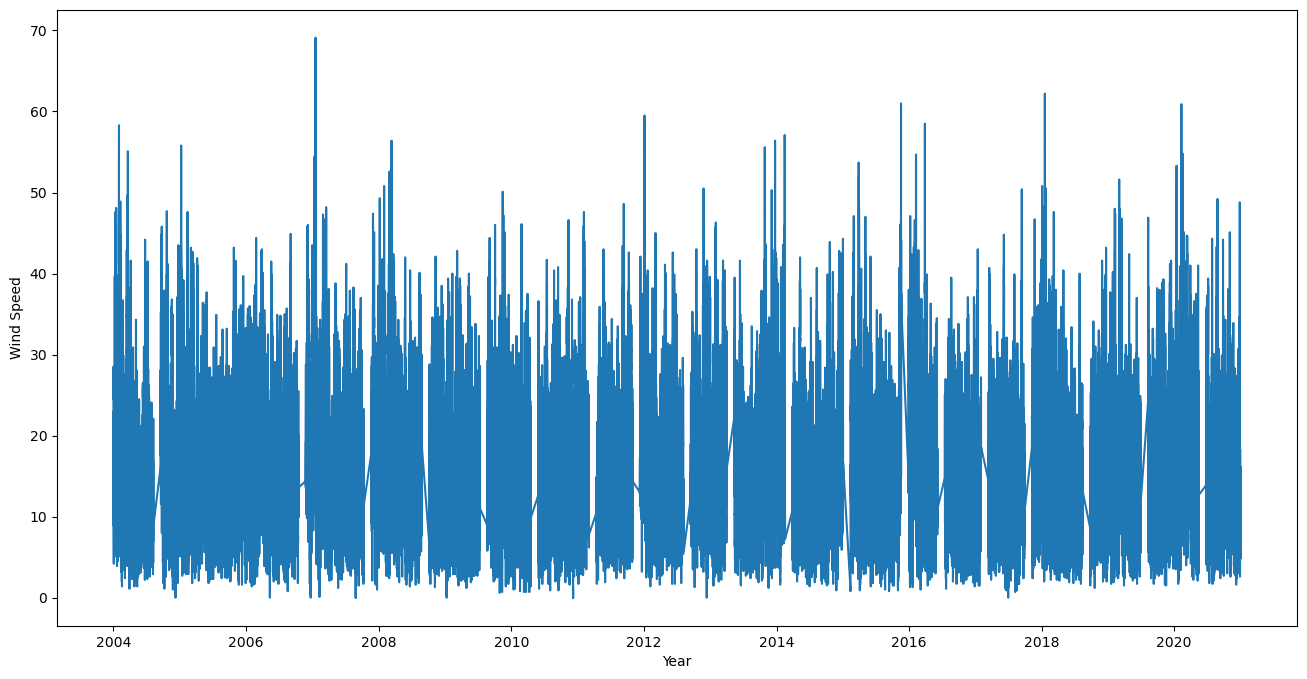

In [24]:
plt.figure(figsize=(16,8))
plt.plot(df.index, df['windspeed'])
plt.xlabel('Year')
plt.ylabel('Wind Speed')


# Breaking data into Chunk for better understanding.

Breaking Data into chunck to identify gaps.

Text(0, 0.5, 'Wind Speed')

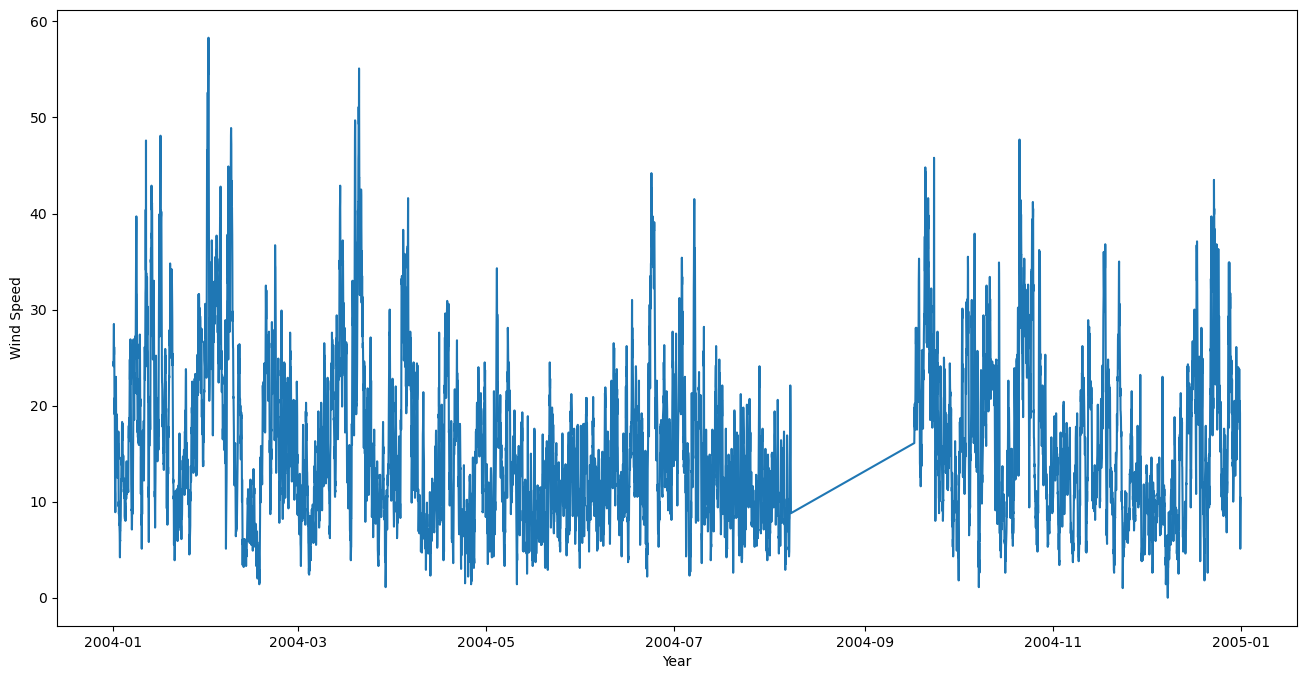

In [25]:
df_chunk = df.loc['2004-01':'2004-12']
plt.figure(figsize=(16,8))
plt.plot(df_chunk.index, df_chunk['windspeed'])
plt.xlabel('Year')
plt.ylabel('Wind Speed')

As per graph there are missing dates for some months in data.

In [26]:
print("Missing Values: ",df_chunk.reindex(pd.date_range('2004-07', '2004-10' )).isnull().all(1).sum())
df_chunk.reindex(pd.date_range('2004-07', '2004-10')).isnull().all(1)

Missing Values:  40


2004-07-01    False
2004-07-02    False
2004-07-03    False
2004-07-04    False
2004-07-05    False
              ...  
2004-09-27    False
2004-09-28    False
2004-09-29    False
2004-09-30    False
2004-10-01    False
Freq: D, Length: 93, dtype: bool

In [27]:
#reindexing data after filling missing values indexes:
df = df.reindex(pd.date_range(start=df.index[0], end=df.index[-1], freq='H'))
print("Data chunk size: ",len(df_chunk))

# Checking for missing values:
print(df.isna().sum())

Data chunk size:  7823
temp                        18256
dew                         18256
humidity                    18256
precip                      18256
precipprob                  18256
snow                        18256
snowdepth                   18256
windspeed                   18256
winddir                     18256
sealevelpressure            18256
cloudcover                  18256
solarradiation              18256
uvindex                     18256
solarenergy                 18256
preciptype_rain             18256
preciptype_snow             18256
preciptype_rain_and_snow    18256
month                       18256
year                        18256
week_of_year                18256
dtype: int64


Text(0, 0.5, 'Wind Speed')

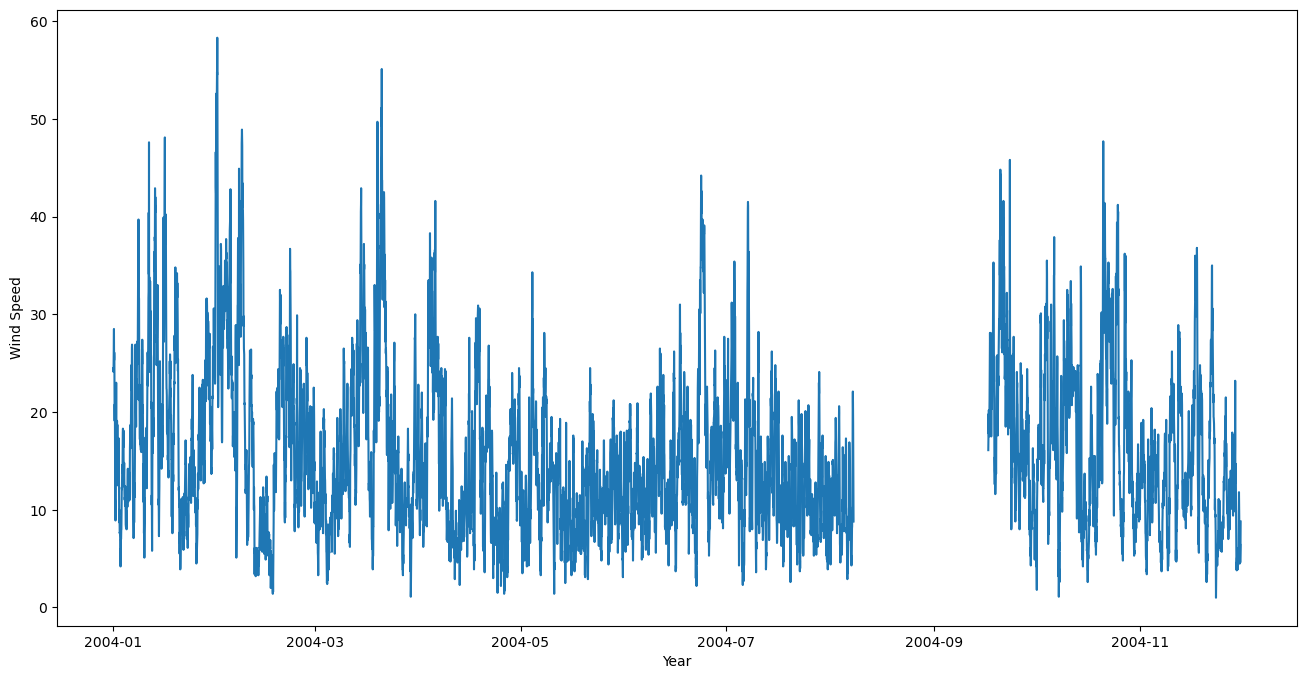

In [28]:
df_chunk = df.loc['2004-01 00:00:00':'2004-12 00:00:00']  # since the date is an index, we can use it to filter our data
plt.figure(figsize=(16,8))
plt.plot(df_chunk.index, df_chunk['windspeed'])
plt.xlabel('Year')
plt.ylabel('Wind Speed')

# Insights:
now that we have filled missing dates now further we will apply ffill, bfill, meanfill, zerofill on chunk of data to analyse which method is most suitable to this dataset:

In [29]:
df_chunk = df.loc['2004-07 00:00:00':'2004-10 00:00:00'] 
df_chunk = df_chunk.copy()
df_chunk = df_chunk.loc[:, 'windspeed'].to_frame()
df_chunk

,windspeed
2004-07-01 00:00:00,18.2
2004-07-01 01:00:00,15.3
2004-07-01 02:00:00,17.1
2004-07-01 03:00:00,16.5
2004-07-01 04:00:00,15.0
...,...
2004-09-30 20:00:00,8.2
2004-09-30 21:00:00,8.0
2004-09-30 22:00:00,10.0
2004-09-30 23:00:00,8.8


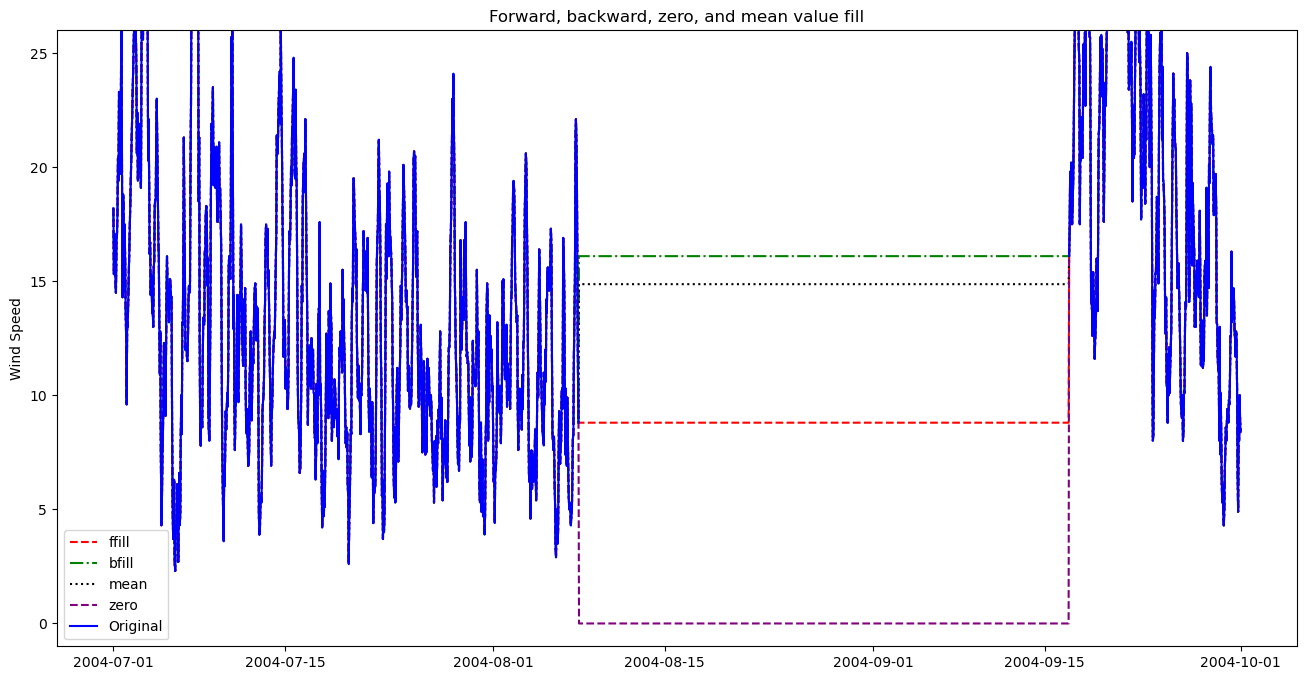

In [30]:
#Forward Fill
df_chunk['ffill'] = df_chunk['windspeed'].ffill()
# Backward Fill
df_chunk['bfill'] = df_chunk['windspeed'].bfill()
# Mean Value Fill
df_chunk['meanfill'] = df_chunk['windspeed'].fillna(df_chunk['windspeed'].mean())  # Note that we're using the mean of df, not of df2
# Fill with 0s
df_chunk['zerofill'] = df_chunk['windspeed'].fillna(0)

# Plot
fig, ax = plt.subplots(figsize=(16,8))

plt.plot(df_chunk.index, df_chunk['ffill'], label='ffill', linestyle='--', color='red')
plt.plot(df_chunk.index, df_chunk['bfill'], label='bfill', linestyle='-.', color='green')
plt.plot(df_chunk.index, df_chunk['meanfill'], label='mean', linestyle=':', color='black')
plt.plot(df_chunk.index, df_chunk['zerofill'], linestyle='--', color='purple', label='zero')
plt.plot(df_chunk.index, df_chunk['windspeed'], color='blue', label='Original')
plt.legend()
plt.ylabel('Wind Speed')
plt.ylim(-1, 26)
_=plt.title('Forward, backward, zero, and mean value fill')

# Insights:
Applying linear_interp, nearest_interp, spline_interp, polynomial_interp on chunk of data to analyse which method is most suitable to this dataset.
bfill and mean seems more reasonable to apply for missing values below we will apply more methods for better comparision.

In [31]:
df_chunk = df.loc['2004-07':'2004-10'] 
df_chunk = df_chunk.copy()
df_chunk = df_chunk.loc[:, 'windspeed'].to_frame()
df_chunk

,windspeed
2004-07-01 00:00:00,18.2
2004-07-01 01:00:00,15.3
2004-07-01 02:00:00,17.1
2004-07-01 03:00:00,16.5
2004-07-01 04:00:00,15.0
...,...
2004-10-31 19:00:00,8.8
2004-10-31 20:00:00,9.9
2004-10-31 21:00:00,9.3
2004-10-31 22:00:00,10.2


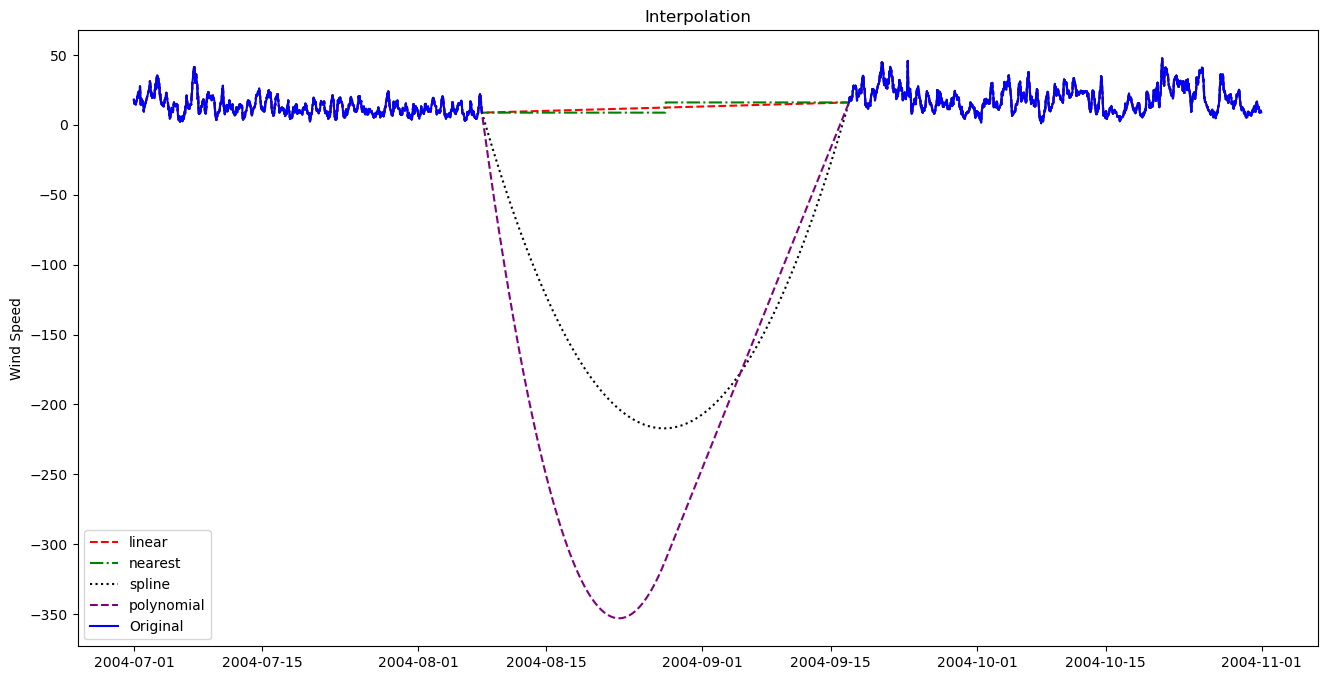

In [32]:
df_chunk['linear_interp'] = df_chunk['windspeed'].interpolate(method='linear')
df_chunk['nearest_interp'] = df_chunk['windspeed'].interpolate(method='nearest')
df_chunk['spline_interp'] = df_chunk['windspeed'].interpolate(method='spline', order=2)
df_chunk['polynomial_interp'] = df_chunk['windspeed'].interpolate(method="polynomial", order=2)

fig, ax = plt.subplots(figsize=(16,8))

plt.plot(df_chunk.index, df_chunk['linear_interp'], linestyle='--', color='red', label='linear')
plt.plot(df_chunk.index, df_chunk['nearest_interp'], linestyle='-.', color='green', label='nearest')
plt.plot(df_chunk.index, df_chunk['spline_interp'], linestyle=':', color='black', label='spline')
plt.plot(df_chunk.index, df_chunk['polynomial_interp'], linestyle='--', color='purple', label='polynomial')
plt.plot(df_chunk.index, df_chunk['windspeed'], label='Original', color='blue')

plt.legend()
plt.ylabel('Wind Speed')
_=plt.title('Interpolation')

# Insights:
By understanding the graph we can conclude that applying interpolate nearest on chunk of data seems more reasonable to apply below it is applied and plotting is performed to examine it:

Text(0, 0.5, 'Wind Speed')

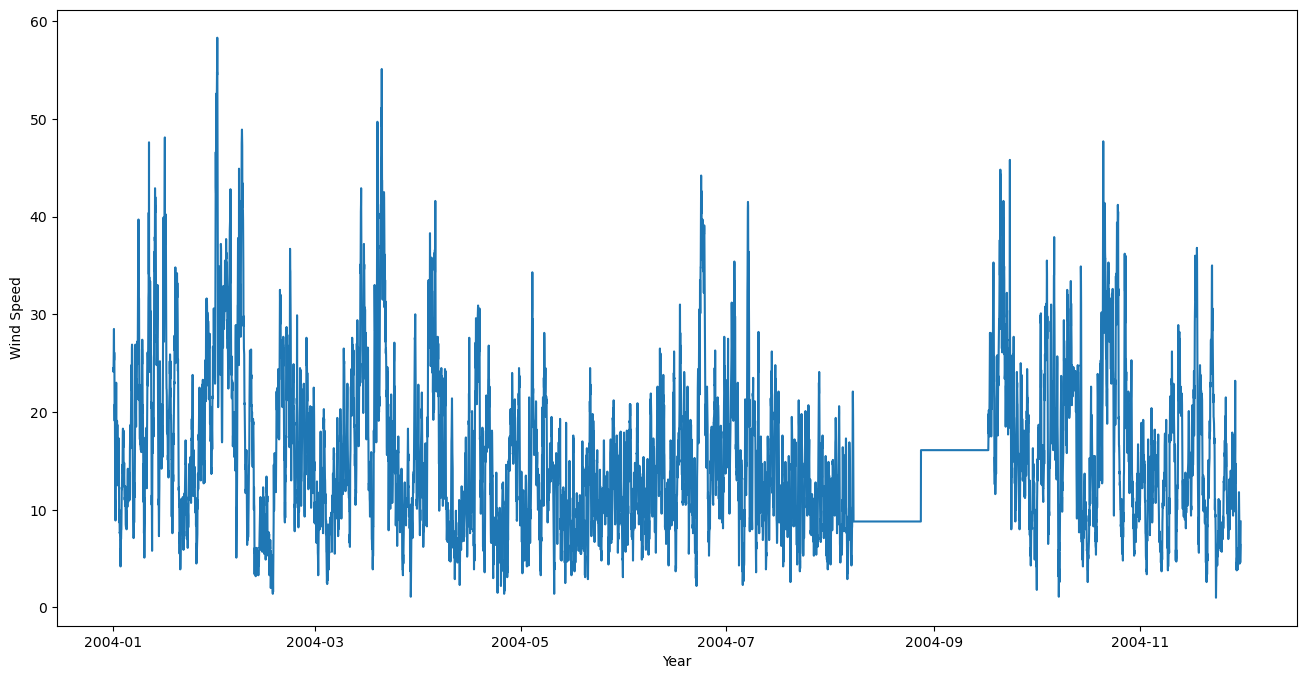

In [33]:
df.loc['2004-07':'2004-10', 'windspeed'] = df_chunk['nearest_interp']

df_chunk = df.loc['2004-01 00:00:00':'2004-12 00:00:00']
plt.figure(figsize=(16,8))
plt.plot(df_chunk.index, df_chunk['windspeed'])
plt.xlabel('Year')
plt.ylabel('Wind Speed')

# Insights:
After applying interpolate nearest for the chunk of data we can see results in above graph the pattern for missing values.

Now applying Interpolate nearest for whole train dataset and filling missing values:

In [34]:
df['windspeed'] = df['windspeed'].interpolate(method='nearest')

df = df.ffill()
df = df.bfill()
df['month'] = df.index.month
df['year'] = df.index.year
df['week_of_year'] = df.index.isocalendar().week

#Missing Values check:
print(df.isna().sum()) 

temp                        0
dew                         0
humidity                    0
precip                      0
precipprob                  0
snow                        0
snowdepth                   0
windspeed                   0
winddir                     0
sealevelpressure            0
cloudcover                  0
solarradiation              0
uvindex                     0
solarenergy                 0
preciptype_rain             0
preciptype_snow             0
preciptype_rain_and_snow    0
month                       0
year                        0
week_of_year                0
dtype: int64


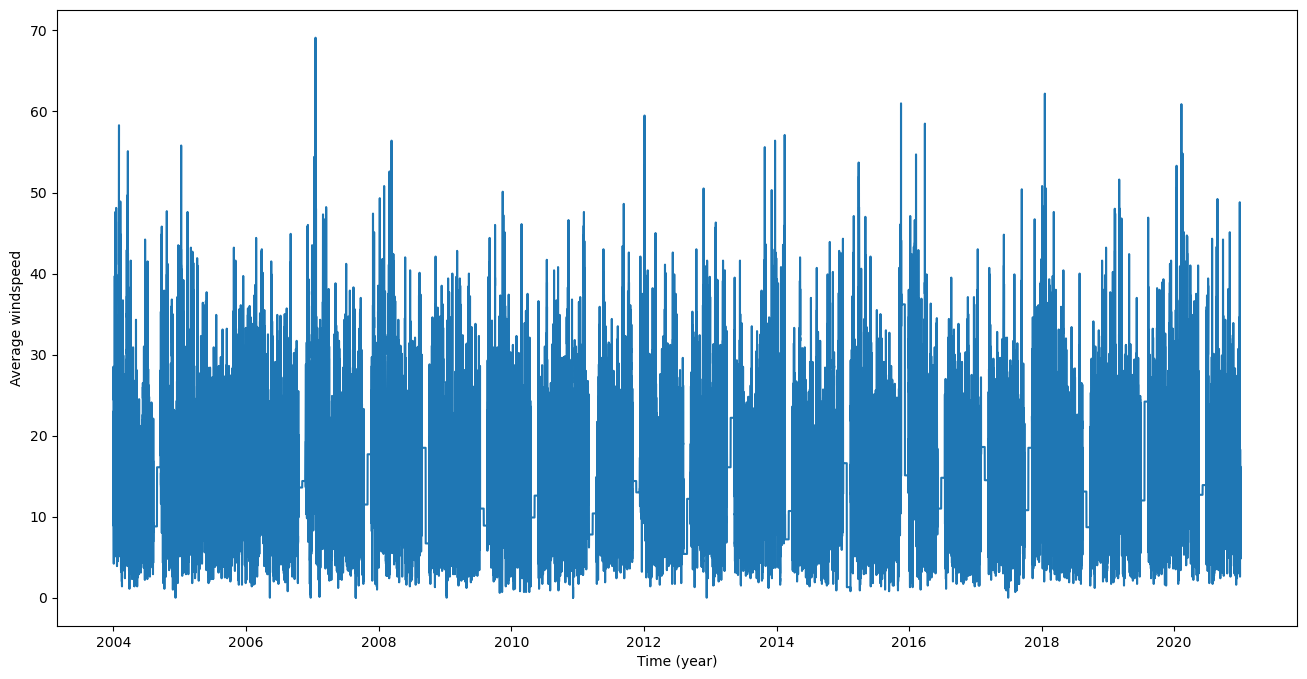

In [35]:
plt.figure(figsize=(16,8))
plt.plot(df.index, df['windspeed'])
plt.ylabel('Average windspeed')
_=plt.xlabel('Time (year)')

# Insights:
The Graph shows time series plot after applying Interpolate nearest for whole train dataset for missing values.

# Trend Analysis Plot

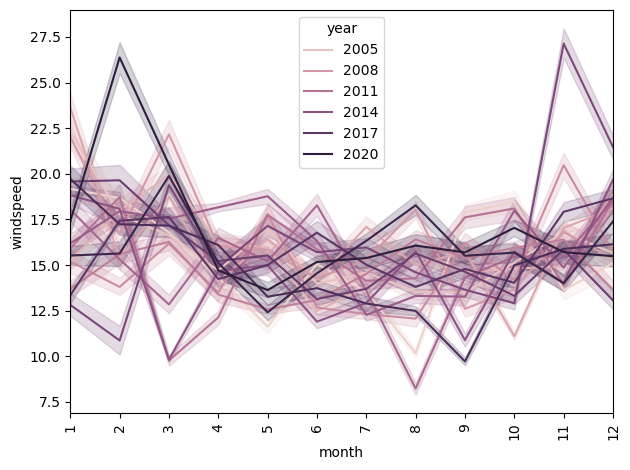

In [36]:
sns.lineplot(x='month', y='windspeed', data=df, hue='year')
_=plt.xticks(np.arange(1, 13), rotation=90)
_=plt.xlim(1, 12)  # limit x-axis
_=plt.tight_layout()

# Insights
~There is a visible seasonality in the data, with peaks and valleys occurring at consistent points throughout the years.

~The overall trend appears to be slightly decreasing over time, although there is some year-to-year variability.

# Decomposotion / Plot:

In [37]:
data_ds = df.loc['2004-01':'2020-01','windspeed'].resample('M').mean().ffill().to_frame()  # one value per month
data_ds

,windspeed
2004-01-31,19.171909
2004-02-29,18.679167
2004-03-31,16.784946
2004-04-30,14.328056
2004-05-31,11.629839
...,...
2019-09-30,15.508889
2019-10-31,15.681586
2019-11-30,14.000833
2019-12-31,17.393817


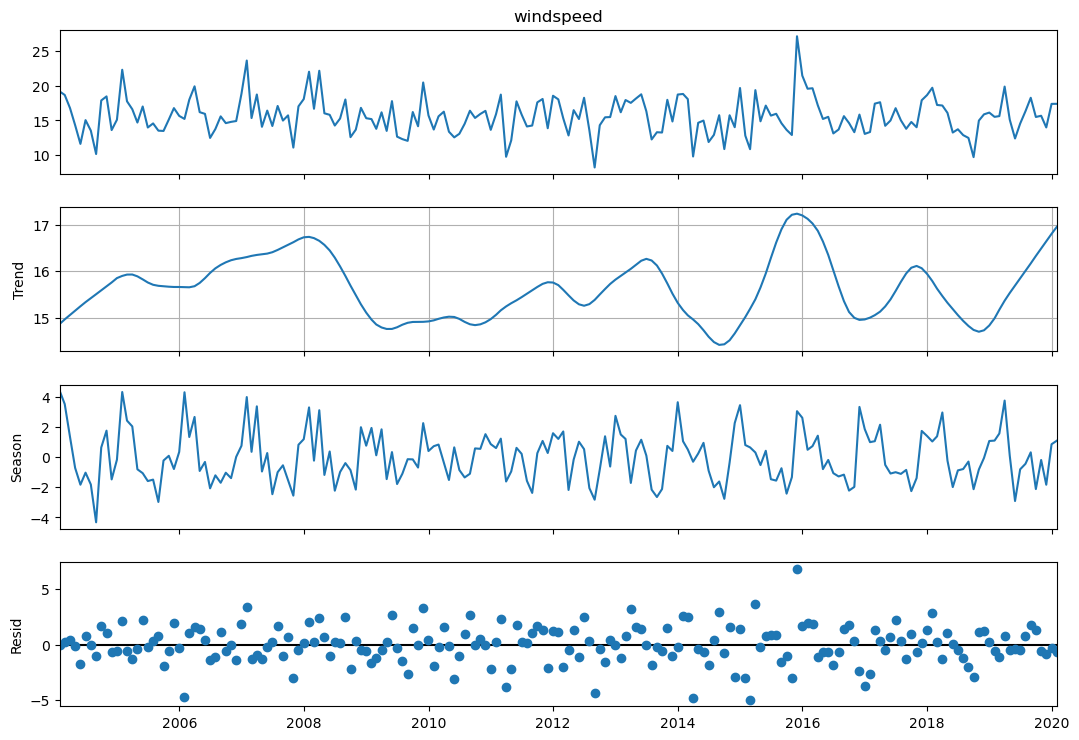

In [38]:
decomposition = STL(data_ds['windspeed']).fit()
fig = decomposition.plot()
fig.set_size_inches(12,8)
fig.axes[1].grid()

# Stationarity Test:

In [39]:
result = adfuller(df['windspeed'])

print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -30.518367033497938
p-value: 0.0
Critical Values:
	1%: -3.4303938989875995
	5%: -2.8615594027350357
	10%: -2.566780327384666


# Insights:

~The ADF test results suggest that the windspeed time series data is likely stationary. This implies that the statistical properties of the windspeed series, such as mean and variance, are relatively constant over time.

~Stationarity is an important property for time series analysis as it allows for the application of various forecasting techniques.

~The low p-value and the ADF statistic being significantly lower than the critical values provide strong evidence in favor of the windspeed series being stationary.

~These findings indicate that the windspeed data may be suitable for modeling and forecasting purposes.


# Autocorrelation plot:

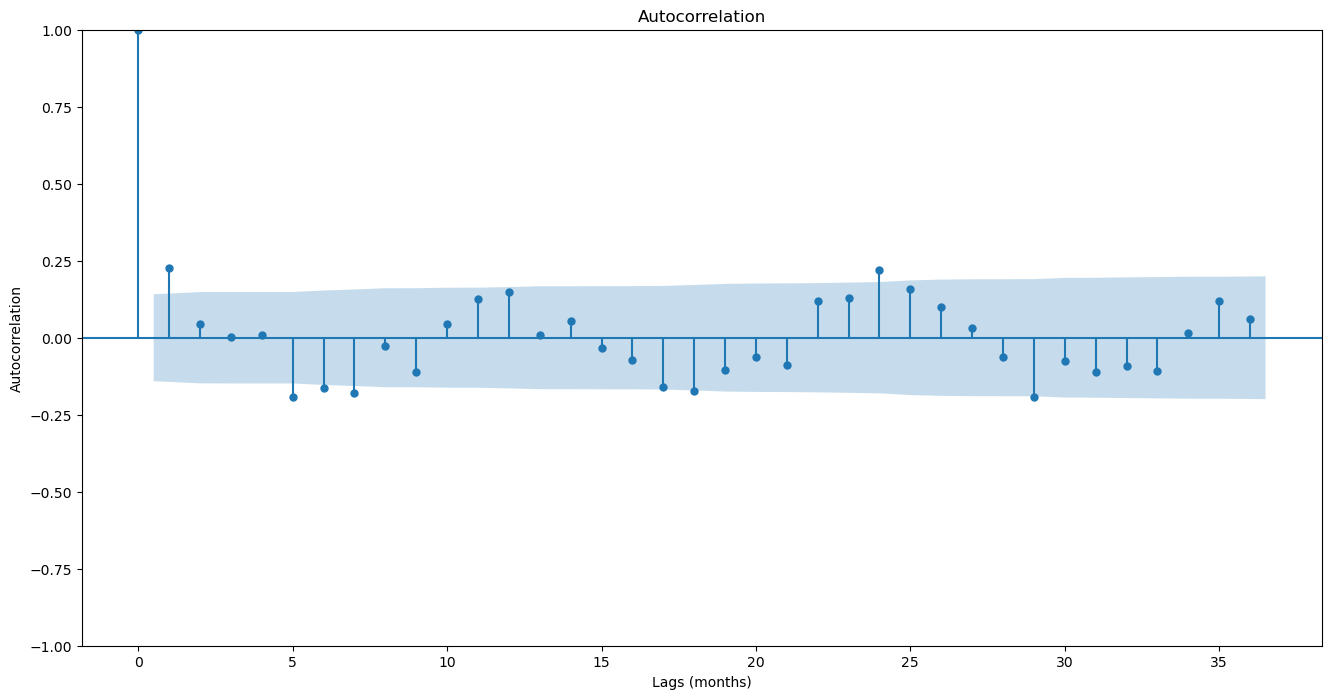

In [40]:
fig, ax = plt.subplots(figsize=(16,8))
_=plot_acf(data_ds['windspeed'], lags=36, ax=ax) 
_=plt.xlabel('Lags (months)')
_=plt.ylabel('Autocorrelation')

# Exploration:

As per Research and understanding I have made below assumptions:

Annual Electricity use(Kwh) in uk

Low: 1800
Medium: 2700
High: 4100

Formula:
Power = 0.5 x Swept Area x Air Density x Velocity3


Refrences:
https://www.ofgem.gov.uk/information-consumers/energy-advice-households/average-gas-and-electricity-use-explained
https://www.ovoenergy.com/guides/energy-guides/how-much-electricity-does-a-home-use
http://www.reuk.co.uk/wordpress/wind/calculation-of-wind-power/


# Wind Energy Consumption Assumption:

In [41]:
required_energy = 320  # kW
blade_length_meters = 50
threshold_energy = required_energy * 3  # kW
air_density_kg_per_m3 = 1.2
number_of_turbines = 20

def calculate_wind_energy_assumption(row):
    wind_speed_m_per_s = row['windspeed']
    swept_area_m2 = blade_length_meters * 3.14
    # Converting speed into m/s
    wind_speed_m_per_s = wind_speed_m_per_s / 3.6
    # Calculating wind energy
    power_kw = 0.5 * air_density_kg_per_m3 * swept_area_m2 * (wind_speed_m_per_s) ** 3
    total_wind_power_kw = number_of_turbines * power_kw
    return total_wind_power_kw / 1000  # Convert to kW

df['wind_energy_assumption'] = df.apply(calculate_wind_energy_assumption, axis=1)
df_info = df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 149040 entries, 2004-01-01 00:00:00 to 2020-12-31 23:00:00
Freq: H
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   temp                      149040 non-null  float64
 1   dew                       149040 non-null  float64
 2   humidity                  149040 non-null  float64
 3   precip                    149040 non-null  float64
 4   precipprob                149040 non-null  float64
 5   snow                      149040 non-null  float64
 6   snowdepth                 149040 non-null  float64
 7   windspeed                 149040 non-null  float64
 8   winddir                   149040 non-null  float64
 9   sealevelpressure          149040 non-null  float64
 10  cloudcover                149040 non-null  float64
 11  solarradiation            149040 non-null  float64
 12  uvindex                   149040 non-null  float64
 13  so

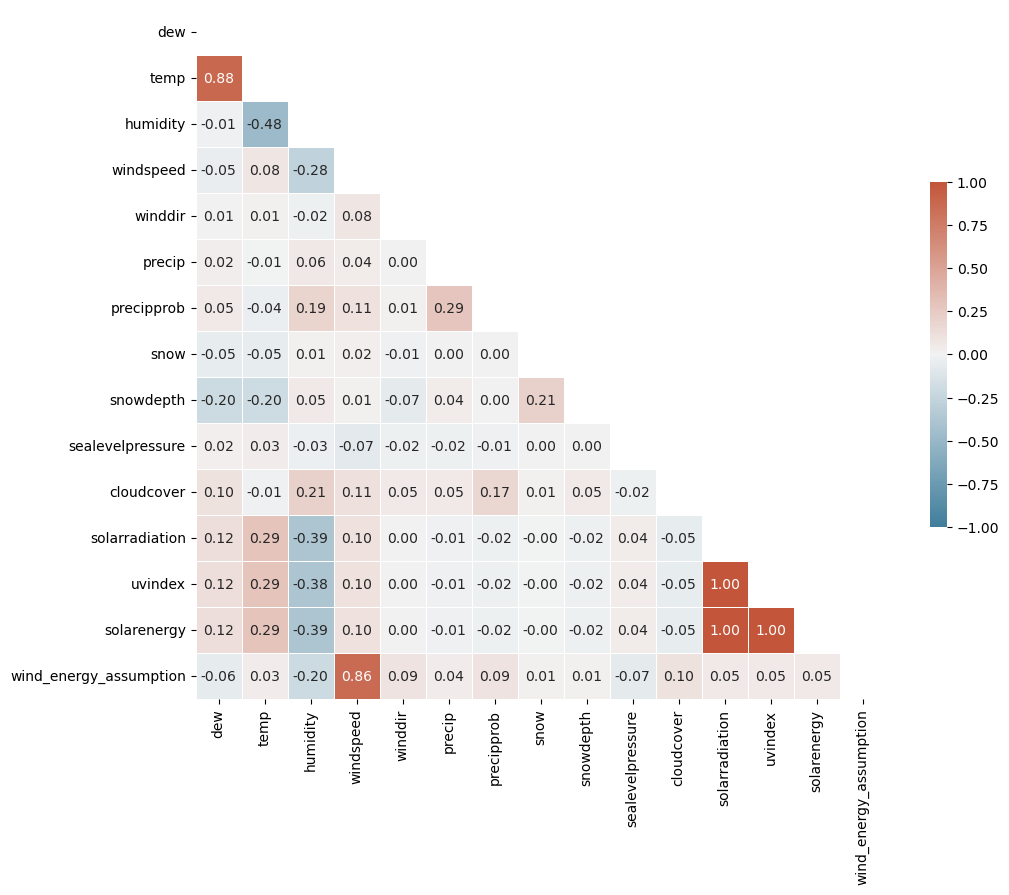

In [42]:
selected_features = ["dew", "temp", "humidity", "windspeed", "winddir", "precip", "precipprob", "snow",
                     "snowdepth", "sealevelpressure", "cloudcover", "solarradiation", "uvindex",
                     "solarenergy", "wind_energy_assumption"]

# Compute the correlation matrix
correlation_matrix = df[selected_features].corr() 

# Generate a mask for the upper triangle
upper_triangle_mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
figure, axes = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
color_map = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=upper_triangle_mask, cmap=color_map, vmin=-1, vmax=1, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, fmt='.2f')
plt.tight_layout()


# Insights:
we can identify from this correlation map that some columns are near to the value of zero and does not depend on target variables so we can neglect them for better accuracy.

`dew
`humidity 
`windspeed
`winddir
`sealevelpressure
`cloudcover

# Normalization of dataset:

We can now exclude irrelevant columns and apply standard scaler normalization:

In [43]:
features = ["dew", "humidity", "windspeed","winddir",
            "sealevelpressure","cloudcover"]
df[features] = StandardScaler().fit_transform(df[features])
df

,temp,dew,humidity,precip,precipprob,snow,snowdepth,windspeed,winddir,sealevelpressure,...,solarradiation,uvindex,solarenergy,preciptype_rain,preciptype_snow,preciptype_rain_and_snow,month,year,week_of_year,wind_energy_assumption
2004-01-01 00:00:00,2.5,-1.275594,0.457745,0.0,0.0,0.0,0.0,1.137379,-0.364505,0.095881,...,0.0,0.0,0.0,False,False,False,1,2004,1,593.843011
2004-01-01 01:00:00,2.9,-1.216768,0.392868,0.0,0.0,0.0,0.0,1.085654,-0.311527,0.072497,...,0.0,0.0,0.0,False,False,False,1,2004,1,565.229114
2004-01-01 02:00:00,3.0,-1.099116,0.616988,0.0,0.0,0.0,0.0,1.253762,-0.194975,0.060805,...,0.0,0.0,0.0,False,False,False,1,2004,1,661.720434
2004-01-01 03:00:00,2.4,-1.157942,0.756325,0.0,0.0,0.0,0.0,1.331350,-0.163189,0.060805,...,0.0,0.0,0.0,False,False,False,1,2004,1,709.730453
2004-01-01 04:00:00,2.2,-1.216768,0.729785,0.0,0.0,0.0,0.0,1.654634,-0.120806,0.016376,...,0.0,0.0,0.0,False,False,False,1,2004,1,934.776910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,-0.6,-1.608941,1.146322,0.0,0.0,0.0,0.0,-0.737671,1.193048,-0.010515,...,0.0,0.0,0.0,False,False,False,12,2020,53,40.380658
2020-12-31 20:00:00,-0.4,-1.569724,1.108723,0.0,0.0,0.0,0.0,-0.543700,1.235430,-0.005838,...,0.0,0.0,0.0,False,False,False,12,2020,53,61.413934
2020-12-31 21:00:00,-0.4,-1.530506,1.212673,0.0,0.0,0.0,0.0,-0.582495,1.267217,-0.001162,...,0.0,0.0,0.0,False,False,False,12,2020,53,56.731918
2020-12-31 22:00:00,-0.3,-1.530506,1.156644,0.0,0.0,0.0,0.0,-0.905779,1.521511,0.001177,...,0.0,0.0,0.0,False,False,False,12,2020,53,26.590785


# Data Splitting And Saving:

In [46]:
#splitting Data:
train_set = df.loc['2018-01':'2021-12']
validation_set = df.loc['2022-01':'2022-12']
test_set = df.loc['2023-01':]

In [47]:
# Saving data
train_set.to_csv('train_data.csv', index=True)
validation_set.to_csv('validation_data.csv', index=True)
test_set.to_csv('test_data.csv', index=True)